# How-to: run circuit on Braket devices

In [1]:
from qiskit import transpile
from qiskit.circuit.random import random_circuit
from qiskit.visualization import plot_histogram

from qiskit_braket_provider import AWSBraketProvider

Let's create random circuit

In [2]:
circuit = random_circuit(5, 3, seed=42)
circuit.draw()

┌───┐┌───────────────────┐           
q_0: ──────────────────────────■─┤ Y ├┤ U2(6.0991,5.6116) ├───────────
       ┌───────────────────┐   │ ├───┤└┬──────────────────┤           
q_1: ──┤ R(4.3817,0.59173) ├───┼─┤ H ├─┤ R(4.7632,2.2276) ├───────────
       └───────────────────┘   │ └─┬─┘ └──────────────────┘           
q_2: ──────────────────────────■───┼────────────■────────────■────────
     ┌───────────────────────┐     │            │            │   ┌───┐
q_3: ┤0                      ├─────■────────────┼────────────┼───┤ H ├
     │  {XX+YY}(6.13,4.7824) │            ┌─────┴──────┐   ┌─┴──┐└───┘
q_4: ┤1                      ├────────────┤ Ry(4.0455) ├───┤ Sx ├─────
     └───────────────────────┘            └────────────┘   └────┘

Get statevector simulator

In [3]:
provider = AWSBraketProvider()
state_vector_simulator_backend = provider.get_backend("SV1")
state_vector_simulator_backend

BraketBackend[SV1]

Transpile circuit against given backend

In [4]:
transpiled_circuit = transpile(circuit, backend=state_vector_simulator_backend, seed_transpiler=42)
transpiled_circuit.draw(idle_wires=False, fold=-1)

global phase: 2.0774
                                        ┌───────────┐     ┌────┐    ┌────────────┐                                                                                                                                           
q_0 -> 0 ───────────────────────■───────┤ P(2.2423) ├─────┤ √X ├────┤ P(-1.7549) ├───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
         ┌──────────────┐       │       ├───────────┴┐┌───┴────┴───┐└────────────┘                ┌───┐┌─────────────┐ ┌────────────┐┌──────────────┐                                                                        
q_1 -> 1 ┤ Rz(-0.14167) ├───────┼───────┤ Ry(2.4735) ├┤ Rz(2.9079) ├──────────────────────────────┤ X ├┤ Rz(-2.4203) ├─┤ Ry(2.2266) ├┤ Rz(-0.95318) ├────────────────────────────────────────────────────────────────────────
         └──────────────┘       │       └────────────┘└────────────┘                              └─┬─┘└─────────────┘ └────────────┘└──────────────┘      ┌────────┐                                                        
q_2 -> 2 ───────────────────────■───────────────────────────────────────────────────────────────────┼─────────■────────────────────────────────────────■───┤ P(π/4) ├─────────────■───────────────■──────────────────────────
                         ┌─────────────┐    ┌───┐     ┌────────────┐    ┌───┐     ┌──────────────┐  │         │         ┌──────────┐    ┌────────┐     │   └────────┘             │               │                          
q_3 -> 3 ────────────────┤ P(0.069993) ├────┤ X ├─────┤ Ry(-3.065) ├────┤ X ├─────┤ P(-0.069993) ├──■─────────┼─────────┤ Ry(-π/2) ├────┤ Rz(-π) ├─────┼──────────────────────────┼───────────────┼──────────────────────────
                         └─┬─────────┬─┘    └─┬─┘     ├────────────┤    └─┬─┘     ├─────────────┬┘          ┌─┴─┐     ┌─┴──────────┴┐   └────────┘   ┌─┴─┐┌──────────┐┌────────┐┌─┴─┐┌─────────┐┌─┴─┐┌───────────┐┌─────────┐
q_4 -> 4 ──────────────────┤ Ry(π/2) ├────────■───────┤ Ry(-3.065) ├──────■───────┤ Ry(0.45197) ├───────────┤ X ├─────┤ Ry(-2.0228) ├────────────────┤ X ├┤ Ry(-π/2) ├┤ Rz(-π) ├┤ X ├┤ P(-π/4) ├┤ X ├┤ Rz(-3π/4) ├┤ Ry(π/2) ├
                           └─────────┘                └────────────┘              └─────────────┘           └───┘     └─────────────┘                └───┘└──────────┘└────────┘└───┘└─────────┘└───┘└───────────┘└─────────┘

Run circuit

In [5]:
result = state_vector_simulator_backend.run(transpiled_circuit, shots=10)

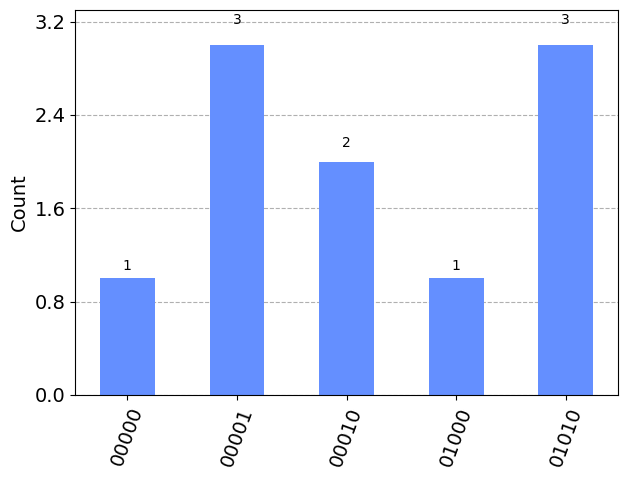

In [6]:
plot_histogram(result.result().get_counts())